# Deep & Gradient Explainer

### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# SHAP
import shap

# Time 
import time

# Tabulate
from tabulate import tabulate

# Java Script Object Notation
import json

# TensorFlow
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

/opt/anaconda3/envs/ml-explain/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


### Loading Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Preprocessing Data

In [3]:
# Shape
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Storage
# x_train = x_train.astype('float32') / 255
# x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Model Architecture

In [4]:
model = Sequential()

model.add(Conv2D(
    32, 
    kernel_size = (3, 3),
    activation='relu',
    input_shape=(28, 28, 1)
))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

2025-05-23 09:28:49.461131: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2025-05-23 09:28:49.461172: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-05-23 09:28:49.461181: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-05-23 09:28:49.461226: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-23 09:28:49.461250: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Compiling model

In [5]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### Training Model

In [6]:
model.fit(
    x_train,
    y_train, 
    batch_size=128,
    epochs=5,
    validation_data=(x_test, y_test)
)

score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/5


2025-05-23 09:28:52.696777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 7ms/step - loss: 0.3248 - accuracy: 0.9009 - val_loss: 0.1048 - val_accuracy: 0.9685
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1408 - accuracy: 0.9591 - val_loss: 0.0782 - val_accuracy: 0.9749
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1195 - accuracy: 0.9647 - val_loss: 0.0741 - val_accuracy: 0.9766
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1177 - accuracy: 0.9665 - val_loss: 0.0663 - val_accuracy: 0.9792
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1160 - accuracy: 0.9681 - val_loss: 0.0656 - val_accuracy: 0.9806


In [7]:
print('Test Loss', score[0])

print('Test Accuracy', score[1])

Test Loss 0.06563220173120499
Test Accuracy 0.9805999994277954


### Computign SHAP Values with The Gradient Explainer

In [8]:
x_sample = shap.sample(x_train, 500)

explainer = shap.GradientExplainer(model, data=x_sample)

In [9]:
start_time = time.time()
shap_values = explainer.shap_values(x_test[:3])
gradient_time = time.time() - start_time

/opt/anaconda3/envs/ml-explain/lib/python3.10/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [10]:
print(len(shap_values))

3


In [11]:
print(shap_values[0].shape)

(28, 28, 1, 10)


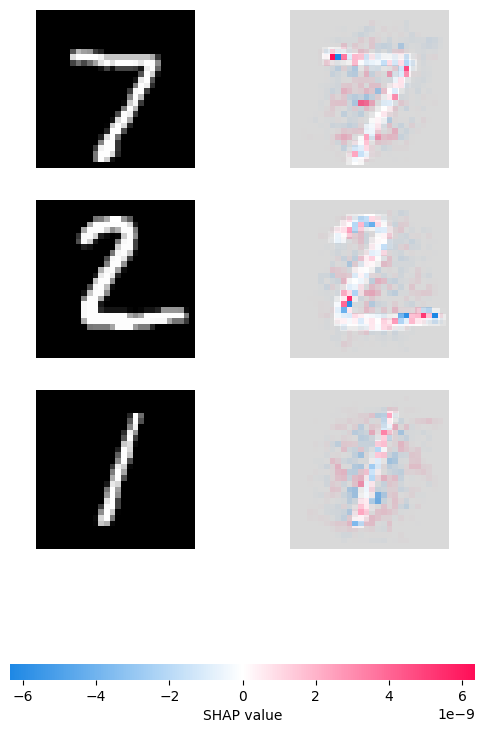

In [12]:
shap.image_plot(shap_values, x_test[:3])

### SHAP with The Deep Explainer

In [13]:
explainer = shap.DeepExplainer(model, data = x_sample)
start_time = time.time()
shap_values = explainer.shap_values(x_test[:3])
deep_time = time.time() - start_time 

/opt/anaconda3/envs/ml-explain/lib/python3.10/site-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(


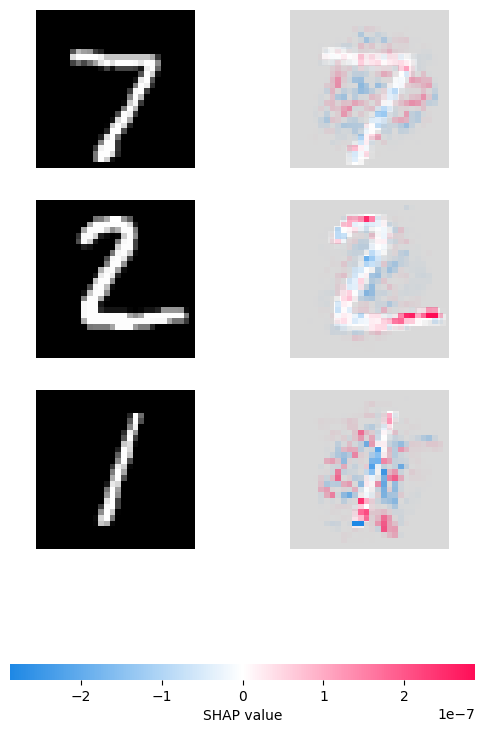

In [14]:
shap.image_plot(shap_values, x_test[:3])

### Time Comparison 

In [15]:
print('Gradient Explainer', round(gradient_time, 2))
print('Deep Explainer', round(deep_time, 2))

Gradient Explainer 1.11
Deep Explainer 2.85
